# TCSS588 midterm project -- Group XYZ

## The notebook link: https://www.kaggle.com/anthonyleo/hierarchical-clustering/notebook
## The dataset link: https://www.kaggle.com/anthonyleo/hierarchical-clustering/data

## Objective
Our objective here is to analyze the proteom data set to determine if there is any underlying structure, and to practice implementing Principal Component Analysis and Hierarchical Clustering.


### Install and import library:

In [1]:
# Data manipulation
install.packages("dplyr")
# Data frame manipulation
install.packages("tibble")
# Data visualization
install.packages("ggplots2")
 # CSV file I/O, e.g. the read_csv function
install.packages("readr")

also installing the dependencies ‘utf8’, ‘bindr’, ‘Rcpp’, ‘cli’, ‘pillar’, ‘bindrcpp’, ‘glue’, ‘pkgconfig’, ‘rlang’, ‘tibble’, ‘plogr’




  There are binary versions available but the source versions are later:
          binary  source needs_compilation
bindr        0.1   0.1.1             FALSE
Rcpp     0.12.14 0.12.16              TRUE
pillar     1.0.1   1.2.2             FALSE
bindrcpp     0.2   0.2.2              TRUE
rlang      0.1.6   0.2.0              TRUE
tibble     1.3.4   1.4.2              TRUE
plogr      0.1-1   0.2.0             FALSE


The downloaded binary packages are in
	/var/folders/bl/k6jbfs4s3bl70_x2_dd5b6w00000gn/T//RtmpUhIr8N/downloaded_packages


installing the source packages ‘bindr’, ‘Rcpp’, ‘pillar’, ‘bindrcpp’, ‘rlang’, ‘tibble’, ‘plogr’




  There is a binary version available but the source version is later:
       binary source needs_compilation
tibble  1.3.4  1.4.2              TRUE



installing the source package ‘tibble’

Warning message:
“package ‘ggplots2’ is not available (for R version 3.3.3)”


The downloaded binary packages are in
	/var/folders/bl/k6jbfs4s3bl70_x2_dd5b6w00000gn/T//RtmpUhIr8N/downloaded_packages


In [2]:
library(dplyr) # Data manipulation
library(tibble) # Data frame manipulation
library(ggplot2) # Data visualization
library(readr) # CSV file I/O, e.g. the read_csv function


Attaching package: ‘dplyr’

The following objects are masked from ‘package:stats’:

    filter, lag

The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union



### Load data:

In [3]:
proteoms <- read.csv("/Users/Guang/Downloads/77_cancer_proteomes_CPTAC_itraq.csv")
proteoms[1:10, 1:8]
dim(proteoms)

RefSeq_accession_number,gene_symbol,gene_name,AO.A12D.01TCGA,C8.A131.01TCGA,AO.A12B.01TCGA,BH.A18Q.02TCGA,C8.A130.02TCGA
NP_958782,PLEC,plectin isoform 1,1.0961312,2.609943,-0.6598280,0.1953407,-0.4940596
NP_958785,NA,plectin isoform 1g,1.1113704,2.650422,-0.6487422,0.2154129,-0.5038992
NP_958786,PLEC,plectin isoform 1a,1.1113704,2.650422,-0.6542851,0.2154129,-0.5006193
NP_000436,NA,plectin isoform 1c,1.1075606,2.646374,-0.6321133,0.2053768,-0.5104589
NP_958781,NA,plectin isoform 1e,1.1151802,2.646374,-0.6404277,0.2154129,-0.5038992
NP_958780,PLEC,plectin isoform 1f,1.1075606,2.646374,-0.6542851,0.2154129,-0.5038992
NP_958783,PLEC,plectin isoform 1d,1.1113704,2.650422,-0.6487422,0.2154129,-0.5006193
NP_958784,NA,plectin isoform 1b,1.1113704,2.650422,-0.6487422,0.2154129,-0.5006193
NP_112598,NA,epiplakin,-1.5173904,3.909313,-0.6182559,-1.0357599,-1.8453656
NP_001611,AHNAK,neuroblast differentiation-associated protein AHNAK isoform 1,0.4827537,-1.045294,1.2220027,-0.5172257,-0.4055031


[1] 12553    86

### Clean data

In [4]:
# The clean data part below is added by our group

## Remove these two columns -- gene symbol and ID
proteoms$gene_symbol <- NULL
proteoms$gene_name <- NULL  
clean.proteoms <- na.omit(proteoms)  ## Remove NA
rownames(clean.proteoms) <- clean.proteoms[,1]
clean.proteoms$RefSeq_accession_number <- NULL
clean.proteoms = t(clean.proteoms)

In [5]:
head(clean.proteoms)
dim(clean.proteoms)

,NP_958782,NP_958785,NP_958786,NP_000436,NP_958781,NP_958780,NP_958783,NP_958784,NP_112598,NP_001611,⋯,NP_001652,NP_071753,NP_001294,NP_065775,NP_001094348,XP_003846524,NP_443073,NP_001004456,NP_997625,NP_003270
AO.A12D.01TCGA,1.0961312,1.1113704,1.1113704,1.1075606,1.1151802,1.1075606,1.1113704,1.1113704,-1.5173904,0.4827537,⋯,0.2351168,-2.043143,-1.5783471,6.780350,-1.01068720,2.6543386,-0.1191944,-2.0240935,1.6371225,-0.2525374
C8.A131.01TCGA,2.6099430,2.6504218,2.6504218,2.6463739,2.6463739,2.6463739,2.6504218,2.6504218,3.9093128,-1.0452935,⋯,-0.4421592,2.468267,1.0393652,1.176993,-0.04951479,0.7155347,1.1446101,-0.1669033,1.0596046,2.1930112
AO.A12B.01TCGA,-0.6598280,-0.6487422,-0.6542851,-0.6321133,-0.6404277,-0.6542851,-0.6487422,-0.6487422,-0.6182559,1.2220027,⋯,1.9509003,-4.301545,-2.5860024,2.147675,-2.57768797,0.1605282,-1.2030369,-3.0710103,1.6488097,-2.8132632
BH.A18Q.02TCGA,0.1953407,0.2154129,0.2154129,0.2053768,0.2154129,0.2154129,0.2154129,0.2154129,-1.0357599,-0.5172257,⋯,0.7071841,2.008538,2.1490437,3.811698,-0.32988430,-8.7167566,1.7007625,2.3531120,0.4228266,0.3893728
C8.A130.02TCGA,-0.4940596,-0.5038992,-0.5006193,-0.5104589,-0.5038992,-0.5038992,-0.5006193,-0.5006193,-1.8453656,-0.4055031,⋯,1.6640941,1.181953,1.2016326,-1.182832,2.48078148,0.3882251,0.3718258,-1.4452216,0.4931809,2.3692659
C8.A138.03TCGA,2.7650807,2.7797092,2.7797092,2.7979949,2.7870235,2.7797092,2.7833664,2.7833664,2.2055384,0.7499970,⋯,-3.4264559,-1.733201,-0.5848588,-1.184630,2.11045275,1.4960534,-1.7185720,0.1977690,-2.3549142,-0.3544590


[1]   83 7994

## Hierarchical Clustering
### Clustering using Dendrogram

In [6]:
d <- dist (clean.proteoms, method="euclidean")

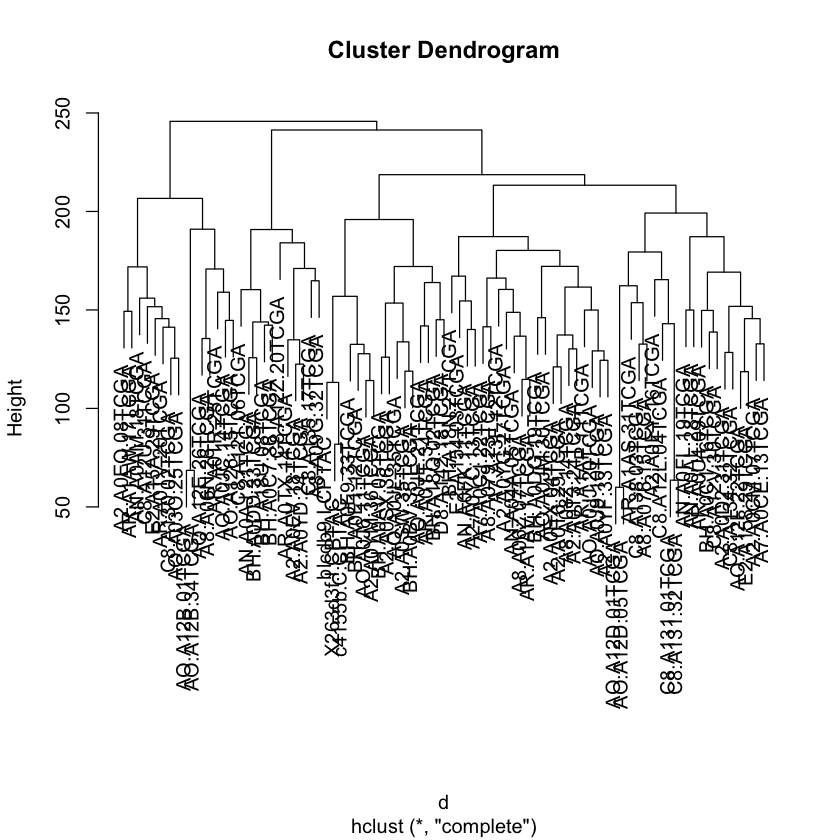

In [7]:
ret.hclust1 <- hclust (d, method="complete")
plot (ret.hclust1)

In [8]:
# The correlation-based dendrogram below is added by our group

## Convert into correlation matrix
dd <- as.dist ((1- cor(t(clean.proteoms)))/2)

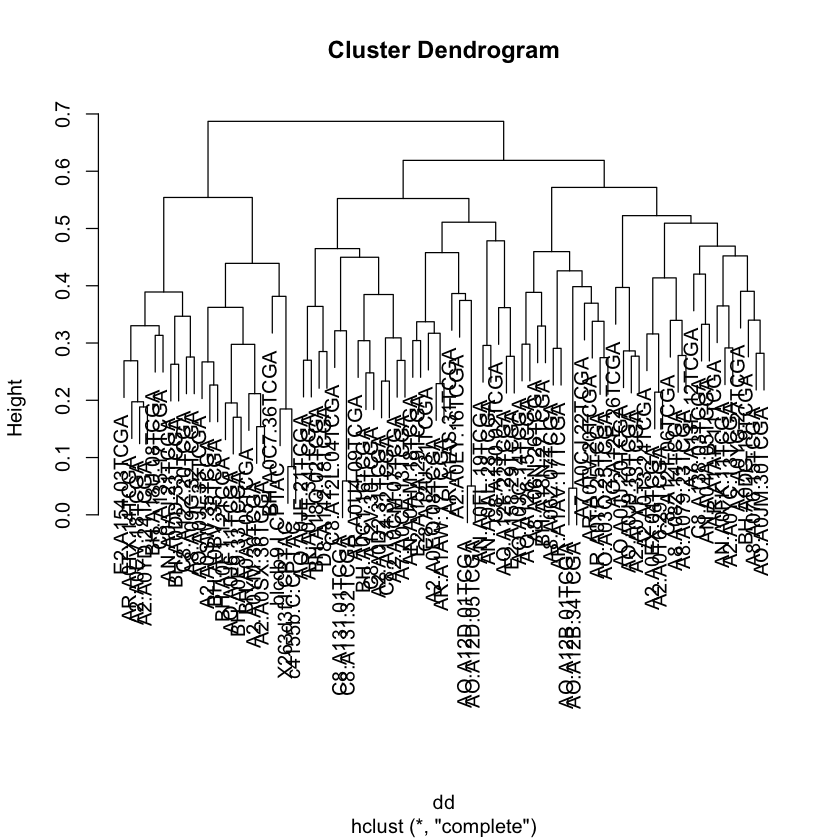

In [9]:
ret.hclust2 <- hclust (dd, method="complete")
plot (ret.hclust2)

### Clustering using heatmap

#### (All Heatmaps are added by our group)

In [11]:
library (gplots)
library("RColorBrewer")


Attaching package: ‘gplots’

The following object is masked from ‘package:stats’:

    lowess



In [12]:
color <- colorRampPalette(c("red", "white", "blue"))(256)

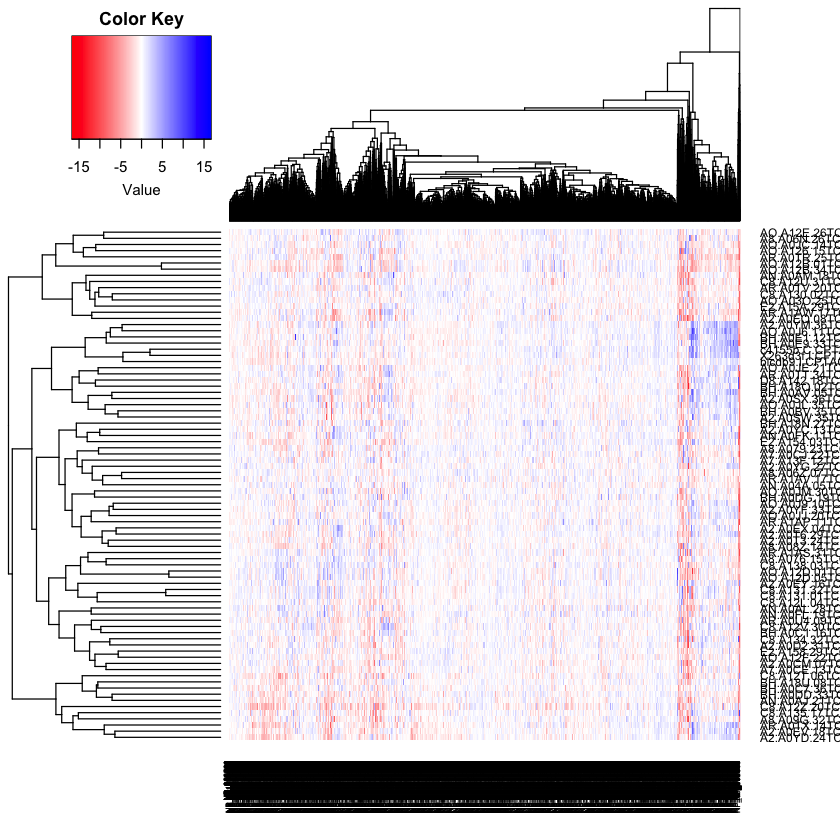

In [13]:
ret.heatmap <- heatmap.2 (as.matrix(clean.proteoms), trace="none", density.info="none", col=color)

In [14]:
newdist <- function (x) {as.dist (1-cor(t(x)))/2}

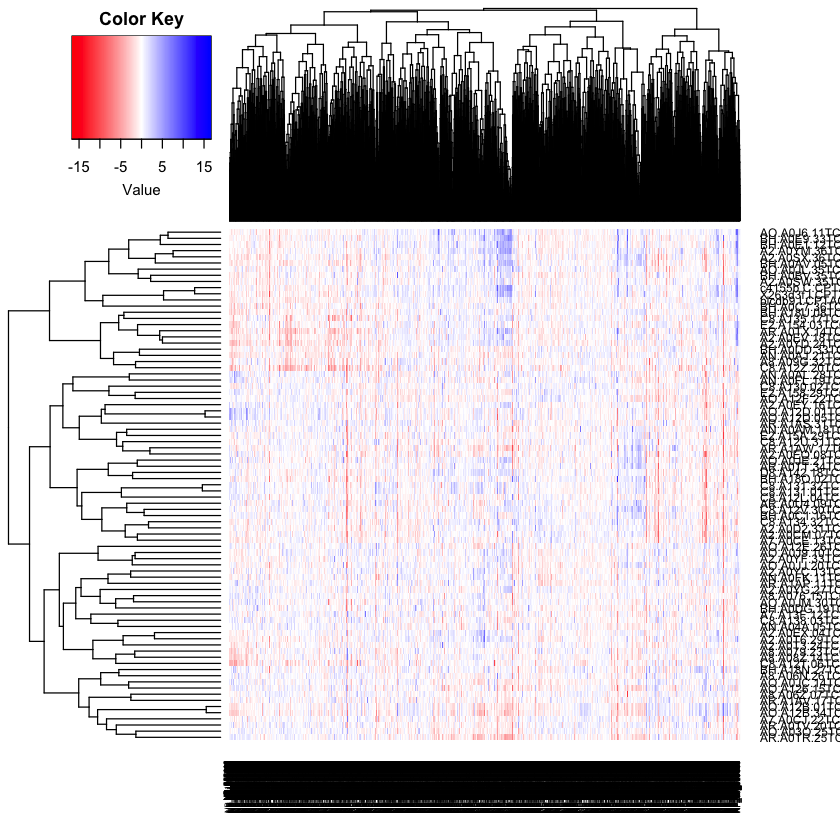

In [15]:
### Heatmap using correlation matrix as input
ret.heatmap1 <- heatmap.2 (as.matrix(clean.proteoms), distfun=newdist, trace="none", density.info="none", col=color)

## Principal Component Analysis
Most clustering techniques including hierarchical clustering do not perform well on data with many predictive variables. This is due to the curse of dimensionality. To address this, we can perform Prinicpal Component Analysis prior to performing hierarchical clustering in order to reduce the dimensionality of our data.

### Perform Prinicpal  Component Analysis:

In [16]:
proteoms.pca <- prcomp(clean.proteoms, center = T)

In [17]:
## Prcomp outputs a list. The 'x' key holds our principal component vectors.
names(proteoms.pca)

[1] "sdev"     "rotation" "center"   "scale"    "x"

In [18]:
head(proteoms.pca$x)
dim(proteoms.pca$x)

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,⋯,PC74,PC75,PC76,PC77,PC78,PC79,PC80,PC81,PC82,PC83
AO.A12D.01TCGA,-48.055964,44.634068,28.268517,-71.85918,1.581538,-34.092052,23.15482,-37.0403909,3.2286473,-10.365988,⋯,0.1396137,-4.3387796,-0.7853821,0.8442947,-1.7896792,15.111447772,-0.9660034,8.4929468,-21.3900099,2.863991e-14
C8.A131.01TCGA,-9.097832,68.196117,17.756947,-44.98501,21.957533,8.746498,56.20723,15.7548400,0.6170026,17.276931,⋯,0.8412844,-2.0646224,2.5406759,1.9555568,-2.1827331,19.650033508,2.2914539,12.0146024,17.1352063,1.296055e-13
AO.A12B.01TCGA,-39.538483,-77.350272,-36.091586,-7.95051,43.803000,8.293376,33.96422,-41.3540553,-4.4693321,8.330269,⋯,2.1128029,-1.9800418,1.3001104,1.1674517,-2.8409349,15.492670045,-3.4145764,-25.1936920,0.1066553,3.699558e-14
BH.A18Q.02TCGA,9.157023,42.348461,-42.713634,20.76119,2.139456,2.900814,-26.95401,-28.0536216,-40.9512191,-9.070821,⋯,-5.6234948,-2.9619617,-2.2773473,-3.8081852,-3.6357675,-0.003382038,1.8633815,0.4539729,-0.7092430,-3.214681e-14
C8.A130.02TCGA,-28.357392,1.336439,6.707092,11.27646,-21.925367,33.573681,-13.69794,8.7739199,22.9380492,-18.177320,⋯,-6.8896379,-0.6634759,1.9528362,1.0812593,3.3561337,-0.062697012,-0.3120650,0.8278641,-0.6388265,-1.916262e-14
C8.A138.03TCGA,-45.411576,-9.695526,44.579759,-34.12381,-18.075951,-18.001745,-10.94017,0.6660058,-6.4935102,18.801238,⋯,-0.1127147,-4.5987800,-0.8947960,-2.4686538,0.3373736,-0.419218575,0.1710196,-0.3782463,0.3796846,1.773902e-13


[1] 83 83

### Determining the number of principal components to use
The point of performing PCA is to reduce the number of dimensions within our data, so we shouldn't use all of the principal components produced by prcomp to do our hierarchical clustering. Each principal component captures a percentage of the variance within our data, and we can see exactly how much variance each principal component accounts for by creating a scree plot.

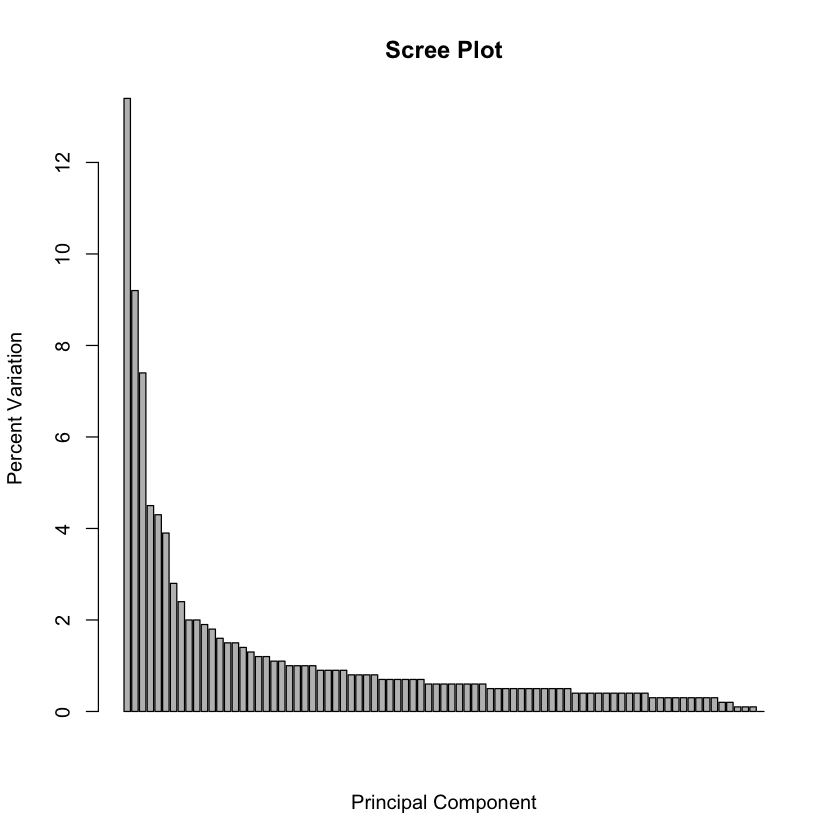

In [19]:
pca.var <- proteoms.pca$sdev^2
pca.var.per <- round(pca.var/sum(pca.var)*100,1)
barplot(pca.var.per, main="Scree Plot", xlab="Principal Component", ylab="Percent Variation")

Here we can see that 30 principal components account for 75.9% of the variance.

In [20]:
(x <- cbind(1:length(pca.var.per),cumsum(pca.var.per)))[x[,1] == 30,]

[1] 30.0 75.9

### Hierarchical Clustering by heatmap after PCA
#### (All Heatmaps are added by our group)
Now that we've determined how many principal components to use, we can pass those vectors into the hclust function.

In [21]:
pca_matrix <- proteoms.pca$x[,1:30]

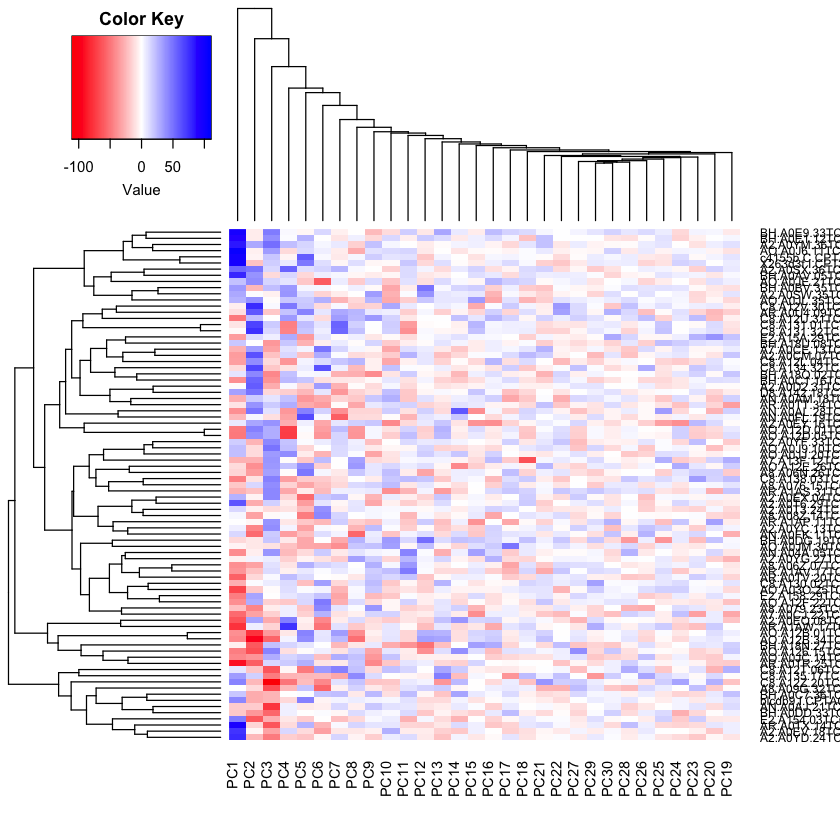

In [22]:
ret.heatmap2 <- heatmap.2 (as.matrix(pca_matrix), trace="none", density.info="none", col=color)

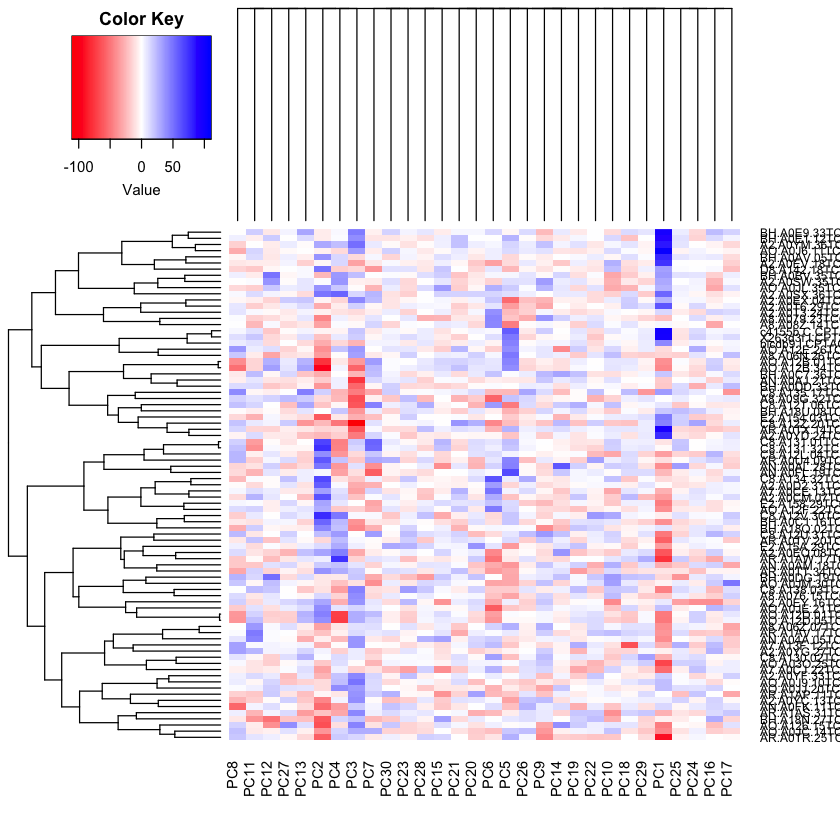

In [23]:
## Use correlation matrix as input
ret.heatmap3 <- heatmap.2 (as.matrix(pca_matrix), distfun=newdist, trace="none", density.info="none", col=color)

### Clustering by Dendrogram after PCA

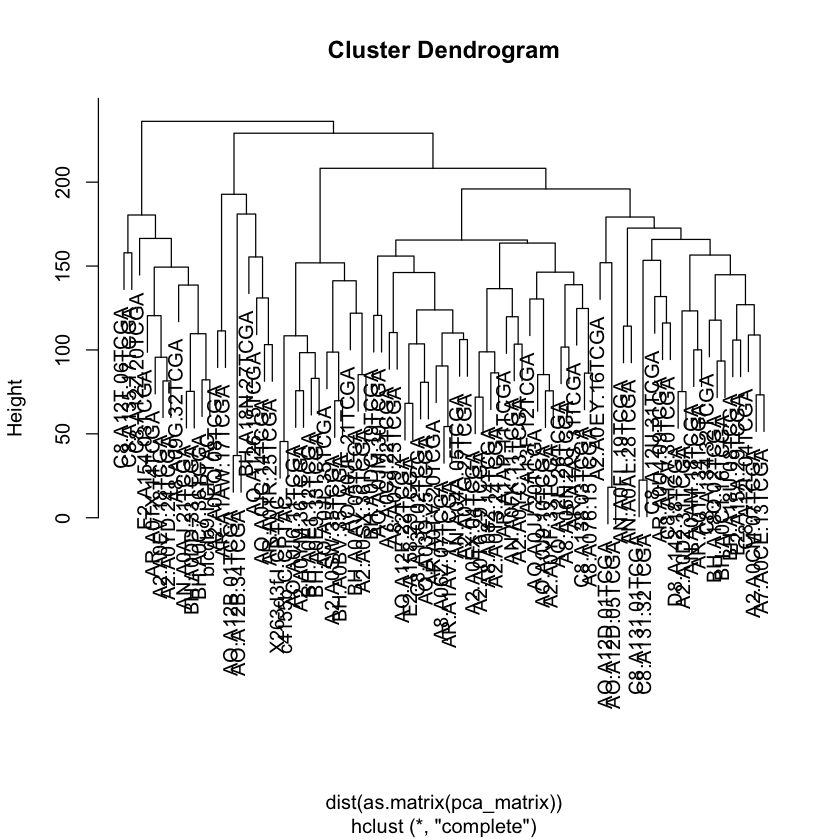

In [24]:
hclust.out <- hclust(dist(as.matrix(pca_matrix)),  method = "complete")
plot(hclust.out)

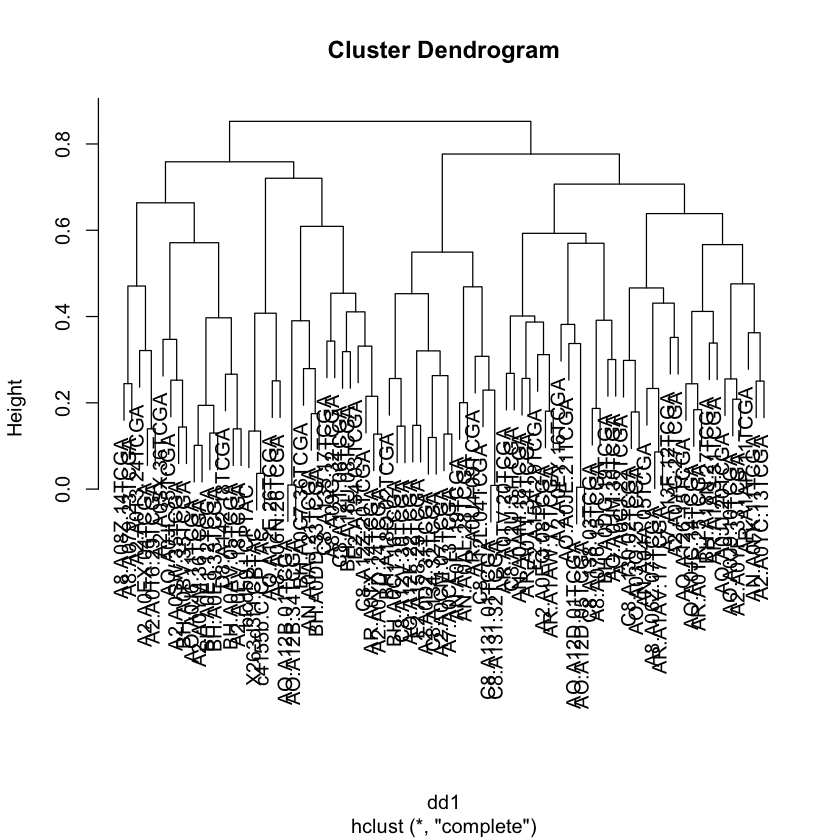

In [25]:
# The correlation-based dendrogram below is added by our group

## Use correlation matrix as input
dd1 <- as.dist ((1- cor(t(pca_matrix)))/2)
hclust.out1 <- hclust (dd1, method="complete")
plot (hclust.out1)

In [26]:
## Using cutree, we can limit the number of clusters within our data. 
## The following code puts our data into four seperate categories.
clust_4 <- cutree(hclust.out1, k = 4)
table(clust_4)

clust_4
 1  2  3  4 
34 15 18 16 

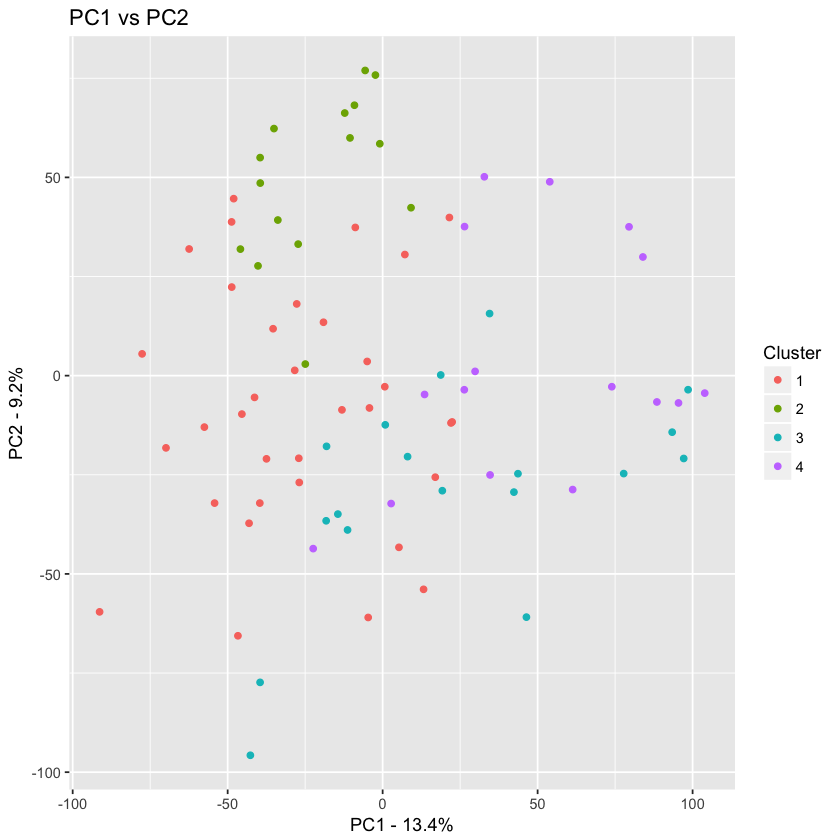

In [27]:
### Plot the Result：

proteoms.pca.data <- data.frame(Cluster=as.factor(clust_4),
                         X=proteoms.pca$x[,1],
                         Y=proteoms.pca$x[,2])

ggplot(data=proteoms.pca.data, aes(x=X,y=Y,col=Cluster)) +
  geom_point() +
  xlab(paste0("PC1 - ", pca.var.per[1], "%")) +
  ylab(paste0("PC2 - ", pca.var.per[2], "%")) +
  ggtitle("PC1 vs PC2")


## Conclusion
1.We've tried both Dendrogram and Heatmap for clustering, and we do see subtle patterns in heatmap with correlation matrix as input.

2.We always compare Euclidean distance and correlation matrix as input for clustering.

3.principal component analysis(PCA) was not able to effectively reduce the dimensionality of our data.
